133008100 DL CSCE 636 Project-1

Project one. Due: 11:59pm (Central Time) on Wednesday 3/8/2023. (Submit all your code with detailed/clear explanations in a single Jupyter notebook file in Canvas. And email your trained model to csce636projects2023@gmail.com with your name and UIN . 118 points)  

This project is on image classification for noisy MNIST dataset. When we add noise to images in the MNIST dataset, the digits in the images become more and more difficult for human to recognize. For example, the images here have increasingly large noise levels. However, interestingly, deep neural networks can still be trained to recognize them relatively well.

Your task is to train a good hand-written-digit recognition classifier for the noisy images. Here are the train_images and train_labels. (You can download them, and then use pickle.load(open(path, 'rb')) to open them. They are both tensorflow tensors.)

You should submit two things:

1) Place all your code in a single Jupyter notebook, and submit it in Canvas. You should accompany your code with clear/detailed explanations, so that we can understand the methods you used.

2) Email your trained model to csce636projects2023@gmail.com. (Please make sure to include your name and UIN in the email.) We need to be able to test your model easily in Google CoLab by running a simple line "test_loss, test_acc = model.evaluate(test_images, test_labels)" on our holdout test set (test_images, test_labels). (If you need to proprocess the images before running the trained model, please include those preprocess functions in your Jupyter notebook, and explain clearly how to run your code. It needs to be simple to run your codes.)

Method of grading: your grade for this project will be equal to:

(test_acc + 0.18) x 100

For example, if your test accuracy is 0.62, then the grade is 80; and if your test accuracy is 0.9, then the grade is 108. However, if the code in your Jupyter notebook is incomplete, the grade will be 0; and if the explanations in the Jupypter notebook are not clear, then 5 points will be taken away.      

Load Training data and labels

In [ ]:
import tensorflow as tf


In [ ]:
import pickle
train_data_path="/content/636_project1_train_images"
train_labels_path="/content/636_project1_train_labels"

train_images=pickle.load(open(train_data_path, 'rb'))
train_labels=pickle.load(open(train_labels_path, 'rb'))

In [ ]:
train_images.shape

TensorShape([60000, 28, 28])

In [ ]:
train_labels.shape

TensorShape([60000])

Reshaping the data

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

In [ ]:
train_images[10001].shape

TensorShape([28, 28, 1])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the K-fold Cross Validator
kfold = KFold(n_splits=4, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(train_images, train_labels):
  inputs = keras.Input(shape=(28, 28, 1))
  x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(10, activation="softmax")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])

    # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(train_images[train],
            train_labels[train],
            epochs=70,
            validation_data=(train_images[test], train_labels[test]),
            batch_size=256)

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  plt.plot(epochs, accuracy, "bo", label="Training accuracy")
  plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
  plt.title("Training and validation accuracy")
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()
  plt.show()
  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/70
176/176 [==============================] - 5s 17ms/step - loss: 2.3013 - accuracy: 0.1388 - val_loss: 3.2756 - val_accuracy: 0.1090
Epoch 2/70
176/176 [==============================] - 2s 13ms/step - loss: 2.0119 - accuracy: 0.2839 - val_loss: 2.9525 - val_accuracy: 0.1425
Epoch 3/70
176/176 [==============================] - 2s 12ms/step - loss: 1.7954 - accuracy: 0.3696 - val_loss: 2.8148 - val_accuracy: 0.1511
Epoch 4/70
176/176 [==============================] - 2s 13ms/step - loss: 1.6085 - accuracy: 0.4451 - val_loss: 1.7019 - val_accuracy: 0.4341
Epoch 5/70
176/176 [==============================] - 2s 14ms/step - loss: 1.5181 - accuracy: 0.4739 - val_loss: 1.5008 - val_accuracy: 0.5241
Epoch 6/70
176/176 [==============================] - 2s 13ms/step - loss: 1.4494 - accuracy: 0.5007 - val_loss: 1.4471 - val_accuracy: 0.5321
Epoch 7/70
176/176 [=========================

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                      

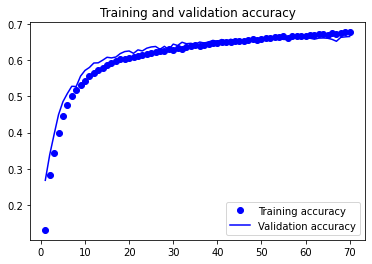

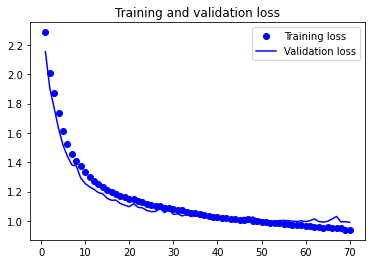

In [ ]:

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=4, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=8, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])

history = model.fit(train_images,
            train_labels,
            epochs=100,
            validation_split = 0.30,
            batch_size=256)

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Epoch 1/100
165/165 [==============================] - 4s 13ms/step - loss: 2.2607 - accuracy: 0.1515 - val_loss: 2.0736 - val_accuracy: 0.2809
Epoch 2/100
165/165 [==============================] - 2s 10ms/step - loss: 2.0014 - accuracy: 0.2889 - val_loss: 1.9213 - val_accuracy: 0.3353
Epoch 3/100
165/165 [==============================] - 2s 10ms/step - loss: 1.8880 - accuracy: 0.3375 - val_loss: 1.8013 - val_accuracy: 0.3789
Epoch 4/100
165/165 [==============================] - 2s 10ms/step - loss: 1.7723 - accuracy: 0.3817 - val_loss: 1.6677 - val_accuracy: 0.4298
Epoch 5/100
165/165 [==============================] - 2s 10ms/step - loss: 1.6496 - accuracy: 0.4297 - val_loss: 1.6124 - val_accuracy: 0.4362
Epoch 6/100
165/165 [==============================] - 2s 10ms/step - loss: 1.5626 - accuracy: 0.4580 - val_loss: 1.4996 - val_accuracy: 0.4889
Epoch 7/100
165/165 [==============================] - 2s 10ms/step - loss: 1.4944 - accuracy: 0.4870 - val_loss: 1.4143 - val_accuracy: